In [4]:
import numpy as np
import matplotlib.pyplot as plt
from confocalQuant.segmentation import toggle_segmentation, extract_channels, toggle_segmentation, show_maxproj_with_outlines, hide_masks
from main import get_czi_files
from os import path


In [5]:
# load outputs
mode = 'r'
folder = './outs/10252023_SREBP2_matchedcohort_out/'
NZi = 3360
xi_per_job = 1024
yi_per_job = 1024
channels = [0, 1, 2]
Njobs = 84
Ncells = 16800

In [6]:
all_mat = np.lib.format.open_memmap(path.join(folder, 'mat.npy'), shape=(NZi, xi_per_job, yi_per_job, len(channels)), dtype='uint8', mode=mode)
all_masks = np.lib.format.open_memmap(path.join(folder, 'masks.npy'), shape=(NZi, xi_per_job, yi_per_job), dtype='uint16', mode=mode)
all_Y_filtered = np.lib.format.open_memmap(path.join(folder, 'Y_filtered.npy'), shape=(Ncells, len(channels)+2), dtype=float, mode=mode)
Ncells_per_job = np.lib.format.open_memmap(path.join(folder, 'Ncells_per_job.npy'), shape=(Njobs,1), dtype=int, mode=mode)
Nzi_per_job = np.lib.format.open_memmap(path.join(folder, 'Nzi_per_job.npy'), shape=(Njobs,1), dtype=int, mode=mode)

In [8]:
all_mat.shape

(3360, 1024, 1024, 3)

In [11]:
# get indices for specific image
ID = 0
cells_per_job = 200
zi_per_job = 40

start_Y = cells_per_job * ID
end_Y = start_Y + Ncells_per_job[ID][0]

start_zi = zi_per_job * ID
end_zi = start_zi + Nzi_per_job[ID][0]

100%|██████████| 15/15 [00:00<00:00, 16.07it/s]


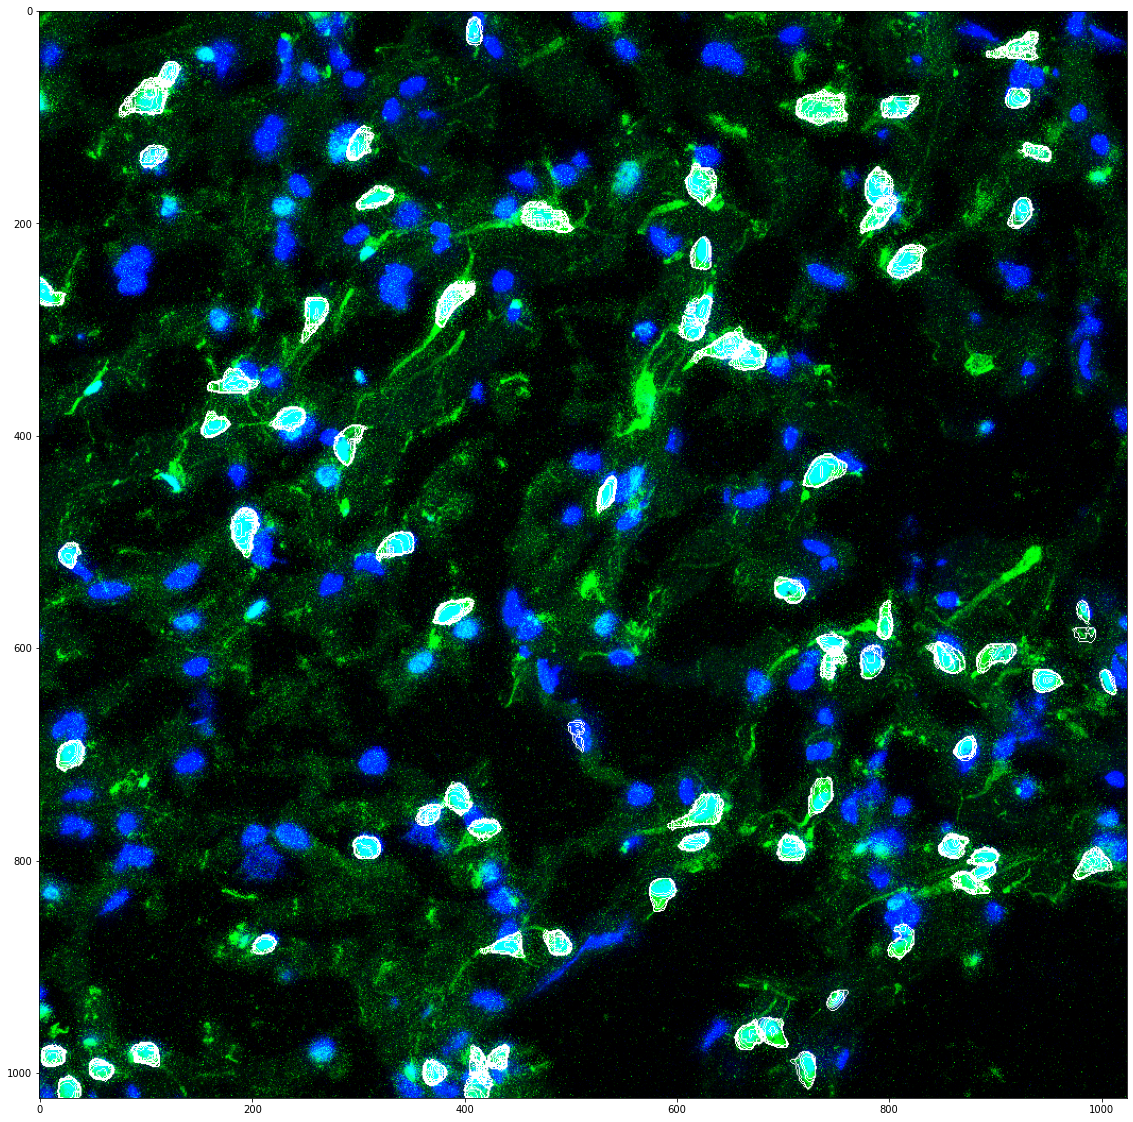

In [17]:
plt.figure(figsize = (20,20))
mat2 = extract_channels([1,2], channels, all_mat[start_zi:end_zi][5:20])

show_maxproj_with_outlines(mat2, all_masks[start_zi:end_zi][5:20])

In [25]:
mat2.shape

(10, 1024, 1024, 4)

100%|██████████| 10/10 [00:00<00:00, 15.86it/s]


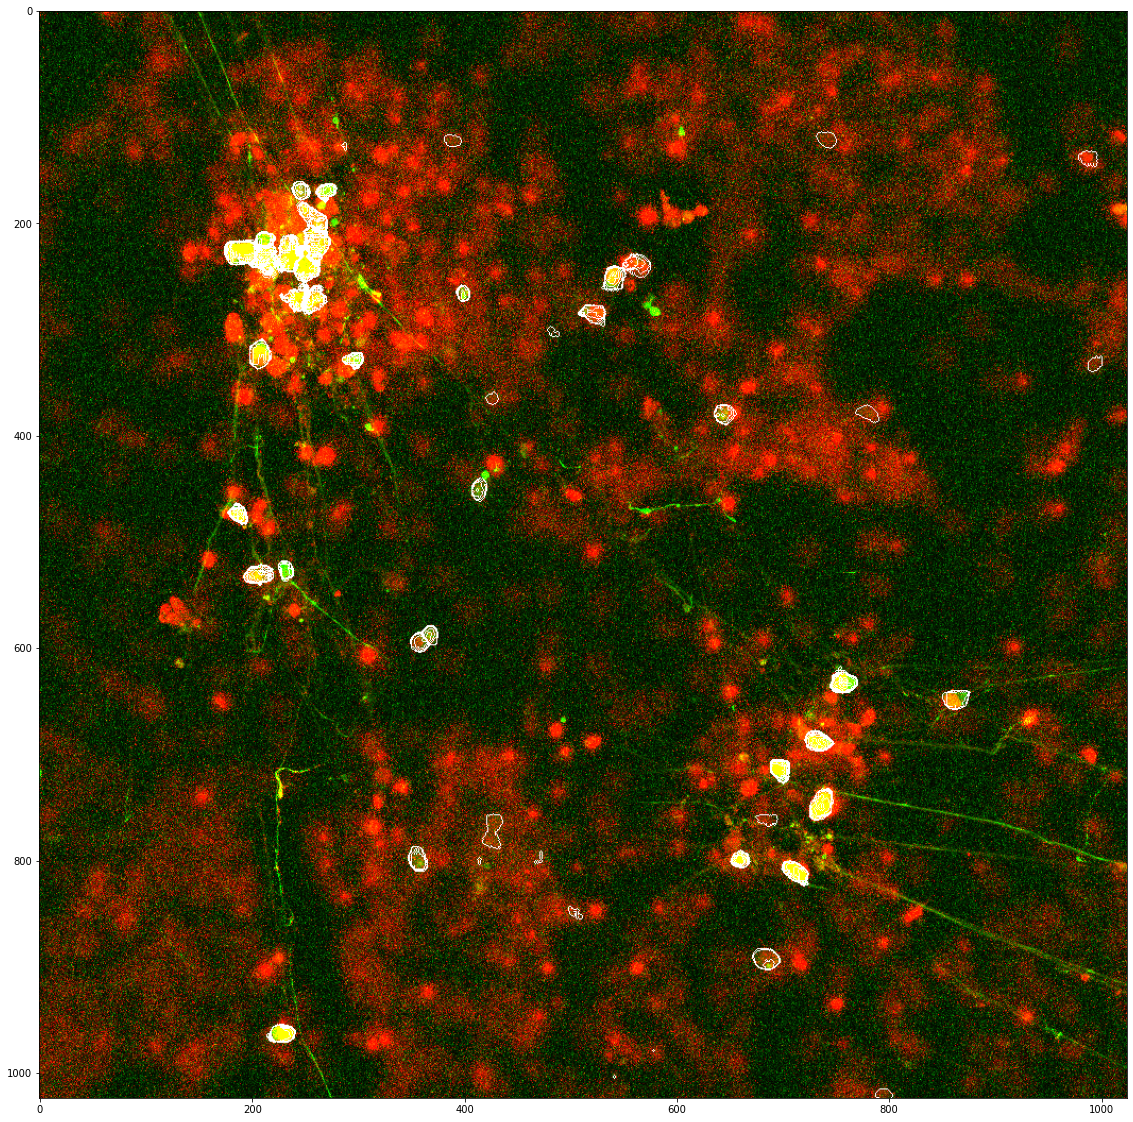

In [26]:
# show projection with filtering
plt.figure(figsize = (20,20))
mat2 = extract_channels([1,0], [0,1,2,3], mat[50:])

show_maxproj_with_outlines(mat2[:,:,:,:3], masks[50:])

In [19]:
mat[50].shape

(1024, 1024, 4)

In [ ]:
mode = 'r+'
all_mat = np.lib.format.open_memmap(path.join(folder, 'mat.npy'), shape=(NZi, xi_per_job, yi_per_job, len(channels)), dtype='uint8', mode=mode)
all_masks = np.lib.format.open_memmap(path.join(folder, 'masks.npy'), shape=(NZi, xi_per_job, yi_per_job), dtype='uint16', mode=mode)
all_Y_filtered = np.lib.format.open_memmap(path.join(folder, 'Y_filtered.npy'), shape=(Ncells, len(channels)+2), dtype=float, mode=mode)
Ncells_per_job = np.lib.format.open_memmap(path.join(folder, 'Ncells_per_job.npy'), shape=(Njobs,1), dtype=int, mode=mode)
